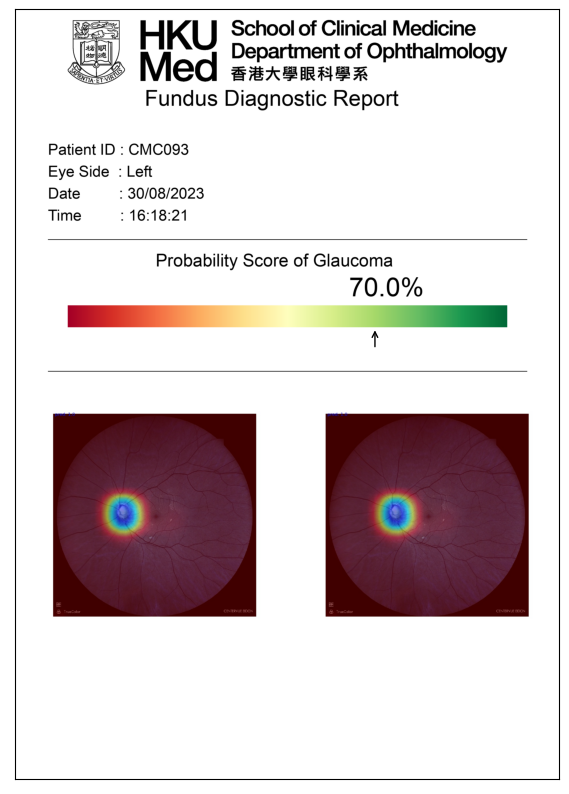

In [147]:
import os
import datetime
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import ImageFont, ImageDraw, Image

def create_report(imagename, prob, raw_image, heatmap):
    
    logo = 'icon/HKUMed_Department of Ophthalmology_Master Logo_AW_2022_Black.png'
    fontfile = 'icon/Arial.ttf'
    # imagename Cmc-093-cmc093-2023-08-30T16_18_21Z-eidon_05075-left-0-visible-2023-08-30T16_19_17Z-2023-08-30T16_19_29Z-image-UWF
    # get patient id, eyeside, date, time
    patient_id = ''.join(imagename.split('-')[:2])
    eyeside = 'Left' if 'left' in imagename else 'Right'
    date = ''.join(imagename.split('-')[3:]).split('T')[0]
    time = ''.join(imagename.split('-')[3:]).split('T')[1].split('Z')[0]

    # create report
    # a A4 size canvas
    canvas = np.zeros((int(3508), int(2480), 3), dtype=np.uint8) + 255

    # put logo at the top center
    logo = cv2.imread(logo)
    logo = cv2.resize(logo, (int(2000), int(logo.shape[0] * 2000 / logo.shape[1])))
    canvas[50:logo.shape[0]+50, int(2480/2-logo.shape[1]/2):int(2480/2+logo.shape[1]/2), :] = logo

    # put patient id, eyeside, date, time
    canvas = Image.fromarray(canvas)
    draw = ImageDraw.Draw(canvas)

    # title at the center - Fundus Diagnostic Report
    draw.text((int(2480/2-650), 350), 'Fundus Diagnostic Report', font=ImageFont.truetype(fontfile, 100), fill=(0, 0, 0))

    arial = ImageFont.truetype(fontfile, 70)
    draw.text((150, 600), 'Patient ID : ' + patient_id.upper(), font=arial, fill=(0, 0, 0))
    draw.text((150, 700), 'Eye Side  : ' + eyeside, font=arial, fill=(0, 0, 0))
    draw.text((150, 800), 'Date         : ' + str(datetime.datetime.strptime(date, '%Y%m%d').strftime('%d/%m/%Y')), font=arial, fill=(0, 0, 0))
    draw.text((150, 900), 'Time         : ' + time.replace('_', ':'), font=arial, fill=(0, 0, 0))

    # draw a horizontal line
    draw.line((150, 1050, 2330, 1050), fill=(0, 0, 0), width=3)

    # put prob and a colorful bar with a arrow
    prob = round(prob, 3)
    # center, font bold, font size
    draw.text((int(2480/2-600)
        , 1100), "Probability Score of Glaucoma", font=ImageFont.truetype(fontfile, 80), fill=(0, 0, 0))
    draw.text((int(prob*2000+2480/2-1000-120), 1200), str(prob*100)+'%', font=ImageFont.truetype(fontfile, 120), fill=(0, 0, 0))
    # horizontal bar from 0 to 1 
    cmap = cm.get_cmap('RdYlGn')
    bar = np.zeros((100, 2000, 3), dtype=np.uint8)
    for i in range(2000):
        bar[:, i, :] = np.array(cmap(i/2000)[:3]) * 255

    # put on center of the canvas
    canvas = np.array(canvas)
    canvas[1350:1450, int(2480/2-bar.shape[1]/2):int(2480/2+bar.shape[1]/2), :] = bar

    canvas = Image.fromarray(canvas)
    draw = ImageDraw.Draw(canvas)
    # draw line
    draw.line((150, 1650, 2330, 1650), fill=(0, 0, 0), width=3)

    canvas = np.array(canvas)
    # put original image on the left and heatmap on the right
    raw_image = cv2.resize(raw_image, (int(1200), int(raw_image.shape[0] * 1200 / raw_image.shape[1])))
    heatmap = cv2.resize(heatmap, (int(1200), int(heatmap.shape[0] * 1200 / heatmap.shape[1])))
    canvas[1700:1700+raw_image.shape[0], 1220-raw_image.shape[1]:1220, :] = raw_image
    canvas[1700:1700+heatmap.shape[0], 1260:1260+heatmap.shape[1], :] = heatmap

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(canvas)
    # put arrow on the canvas
    arrow_props = dict(facecolor='black', arrowstyle='->')
    plt.annotate('', xy=(prob*2000+int(2480/2-bar.shape[1]/2), 1450), xytext=(prob*2000+int(2480/2-bar.shape[1]/2), 1550), arrowprops=arrow_props)
    plt.xticks([])
    plt.yticks([])

    plt.show()
    return

if __name__ == '__main__':
    raw_image = cv2.imread('/home/philip/Documents/Philip_4T/Glaucoma_fundus/x-resnet/Cmc-093-cmc093-2023-08-30T16_18_21Z-eidon_05075-left-0-visible-2023-08-30T16_19_17Z-2023-08-30T16_19_29Z-image-UWF.jpg')
    heatmap = cv2.imread('/home/philip/Documents/Philip_4T/Glaucoma_fundus/x-resnet/Cmc-093-cmc093-2023-08-30T16_18_21Z-eidon_05075-left-0-visible-2023-08-30T16_19_17Z-2023-08-30T16_19_29Z-image-UWF.jpg')
    create_report('Cmc-093-cmc093-2023-08-30T16_18_21Z-eidon_05075-left-0-visible-2023-08-30T16_19_17Z-2023-08-30T16_19_29Z-image-UWF', 0.7, raw_image, heatmap)